

#**ASSIGNMENT-1**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import keras
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_train = pd.read_csv("/content/Mobiletest.csv")
data_test = pd.read_csv("/content/Mobiletrain.csv")

In [4]:
data_test.head()#which display the first five rows of the DataFrame in the output.

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
data_train.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [6]:
data_train.isna().value_counts()# no missing data

id     battery_power  blue   clock_speed  dual_sim  fc     four_g  int_memory  m_dep  mobile_wt  n_cores  pc     px_height  px_width  ram    sc_h   sc_w   talk_time  three_g  touch_screen  wifi 
False  False          False  False        False     False  False   False       False  False      False    False  False      False     False  False  False  False      False    False         False    1000
dtype: int64

In [7]:
data_test.info()#it provides information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
unique_price_ranges = data_test['price_range'].nunique()
print(unique_price_ranges)

4


In [9]:
from sklearn.preprocessing import MinMaxScaler
#scales all data from 0-1 for ease of neural network recognition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

sc=MinMaxScaler()

In [10]:
#Feature engineering
#scale x values(min-max scaler)
X=data_test.drop('price_range',axis=1)
X_final=data_train.drop('id',axis=1)
X_trainscaled=sc.fit_transform(X_final)
X_scaled=sc.fit_transform(X)
Y=data_test['price_range']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)

In [12]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(20,)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=20)


Epoch 1/20
42/42 [==============================] - 1s 1ms/step - loss: 1.4001 - accuracy: 0.2537
Epoch 2/20
42/42 [==============================] - 0s 1ms/step - loss: 1.3667 - accuracy: 0.3179
Epoch 3/20
42/42 [==============================] - 0s 1ms/step - loss: 1.3351 - accuracy: 0.3627
Epoch 4/20
42/42 [==============================] - 0s 1ms/step - loss: 1.2814 - accuracy: 0.4284
Epoch 5/20
42/42 [==============================] - 0s 1ms/step - loss: 1.1872 - accuracy: 0.5201
Epoch 6/20
42/42 [==============================] - 0s 1ms/step - loss: 1.0636 - accuracy: 0.5978
Epoch 7/20
42/42 [==============================] - 0s 1ms/step - loss: 0.9329 - accuracy: 0.6619
Epoch 8/20
42/42 [==============================] - 0s 1ms/step - loss: 0.8257 - accuracy: 0.7007
Epoch 9/20
42/42 [==============================] - 0s 1ms/step - loss: 0.7389 - accuracy: 0.7388
Epoch 10/20
42/42 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.7649
Epoch 11/20
42/42 [

In [13]:
def predictionrelease(preds): #creates an array of predictions from a matrix of percentages of classifications
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [14]:
preds_train=model.predict(X_train)       #testing our cross val sets
train_preds=predictionrelease(preds_train)

42/42 [==============================] - 0s 1ms/step


In [15]:
print(classification_report(y_train,train_preds)) #cross validation
print(confusion_matrix(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       331
           1       0.89      0.90      0.89       338
           2       0.86      0.79      0.82       338
           3       0.88      0.94      0.91       333

    accuracy                           0.90      1340
   macro avg       0.90      0.90      0.90      1340
weighted avg       0.90      0.90      0.90      1340

[[321  10   0   0]
 [  9 304  25   0]
 [  0  29 268  41]
 [  0   0  19 314]]


In [16]:
realpreds=model.predict(X_trainscaled)
realpreds

32/32 [==============================] - 0s 967us/step


array([[4.5468851e-06, 3.9765746e-03, 2.0373200e-01, 7.9228681e-01],
       [3.5823166e-07, 2.6962673e-03, 2.1515244e-01, 7.8215092e-01],
       [9.6703727e-05, 7.7356584e-02, 5.9804577e-01, 3.2450086e-01],
       ...,
       [5.1870221e-01, 4.5744890e-01, 2.3644647e-02, 2.0425425e-04],
       [2.7176195e-03, 3.0790079e-01, 6.3542718e-01, 5.3954434e-02],
       [1.2547009e-04, 5.2075703e-02, 6.0317129e-01, 3.4462741e-01]],
      dtype=float32)

In [17]:
Predarr=pd.Series(data=predictionrelease(realpreds),index=data_train['id'])
Predarr.head(15)
#FINAL SERIES WHICH HAS THE PREDICTIONS TO THE TRAIN SET(ID VS PRICE PREDICTION)

id
1     3
2     3
3     2
4     3
5     1
6     3
7     3
8     1
9     3
10    0
11    3
12    3
13    0
14    0
15    2
dtype: int64

#**ASSIGNMENT-2**

In [18]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [19]:
# Print the shape of the training set
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

# Print the shape of the test set
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [20]:
# Normalize pixel values to the range of 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5036 - accuracy: 0.8232 - val_loss: 0.4382 - val_accuracy: 0.8417
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8631 - val_loss: 0.3980 - val_accuracy: 0.8568
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3450 - accuracy: 0.8731 - val_loss: 0.3777 - val_accuracy: 0.8655
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3191 - accuracy: 0.8840 - val_loss: 0.3648 - val_accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2995 - accuracy: 0.8891 - val_loss: 0.3735 - val_accuracy: 0.8679
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2854 - accuracy: 0.8940 - val_loss: 0.3565 - val_accuracy: 0.8712
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2738 - accuracy: 0.8995 - val_loss: 0.3393 - val_accuracy:

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8832
Test loss: 0.3382684290409088
Test accuracy: 0.8831999897956848


#**ASSIGNMENT-3**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv("/content/penguins.csv")

In [27]:
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [29]:
data.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [30]:
display(data)

rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
3        4     Adelie  Torgersen             NaN            NaN   
4        5     Adelie  Torgersen            36.7           19.3   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
3                  NaN          NaN     NaN  2007  
4                193.0       3450.0  female  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[344 rows x 9 columns]

<ipython-input-31-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

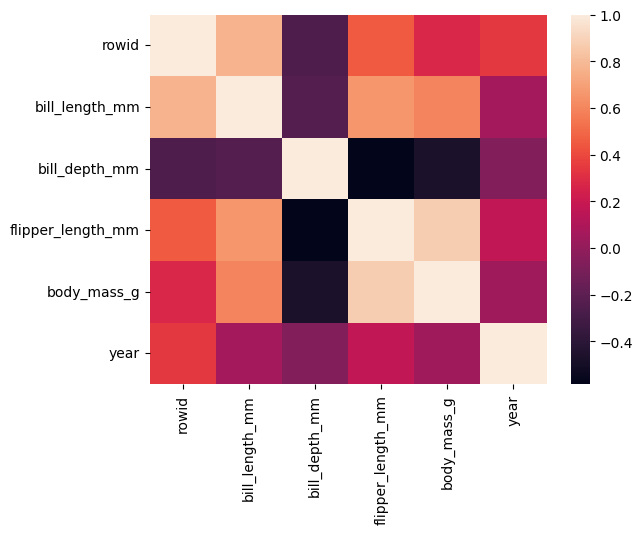

In [31]:
sns.heatmap(data.corr())

In [32]:
print(data.shape) #df.describe(include='all')

(344, 9)


In [33]:
data.describe(include='all')

rowid species  island  bill_length_mm  bill_depth_mm  \
count   344.000000     344     344      342.000000     342.000000   
unique         NaN       3       3             NaN            NaN   
top            NaN  Adelie  Biscoe             NaN            NaN   
freq           NaN     152     168             NaN            NaN   
mean    172.500000     NaN     NaN       43.921930      17.151170   
std      99.448479     NaN     NaN        5.459584       1.974793   
min       1.000000     NaN     NaN       32.100000      13.100000   
25%      86.750000     NaN     NaN       39.225000      15.600000   
50%     172.500000     NaN     NaN       44.450000      17.300000   
75%     258.250000     NaN     NaN       48.500000      18.700000   
max     344.000000     NaN     NaN       59.600000      21.500000   

        flipper_length_mm  body_mass_g   sex         year  
count          342.000000   342.000000   333   344.000000  
unique                NaN          NaN     2          NaN  
top                   NaN          NaN  male          NaN  
freq                  NaN          NaN   168          NaN  
mean           200.915205  4201.754386   NaN  2008.029070  
std             14.061714   801.954536   NaN     0.818356  
min            172.000000  2700.000000   NaN  2007.000000  
25%            190.000000  3550.000000   NaN  2007.000000  
50%            197.000000  4050.000000   NaN  2008.000000  
75%            213.000000  4750.000000   NaN  2009.000000  
max            231.000000  6300.000000   NaN  2009.000000

**Covariance & Correlation**
“Covariance” indicates the direction of the linear relationship between variables.

 “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables

In [34]:
print('Convolution')
data.cov()


Convolution


<ipython-input-34-03ea36ca928d>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


rowid  bill_length_mm  bill_depth_mm  \
rowid               9890.000000      414.774595     -50.835427   
bill_length_mm       414.774595       29.807054      -2.534234   
bill_depth_mm        -50.835427       -2.534234       3.899808   
flipper_length_mm    635.047950       50.375765     -16.212950   
body_mass_g        21911.008643     2605.591912    -747.370093   
year                  27.597668        0.243345      -0.097395   

                   flipper_length_mm    body_mass_g       year  
rowid                     635.047950   21911.008643  27.597668  
bill_length_mm             50.375765    2605.591912   0.243345  
bill_depth_mm             -16.212950    -747.370093  -0.097395  
flipper_length_mm         197.731792    9824.416062   1.949701  
body_mass_g              9824.416062  643131.077327  27.661162  
year                        1.949701      27.661162   0.669706

In [35]:
print('Correlation')
data.corr()


Correlation


<ipython-input-35-a0787c4814e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
rowid              1.000000        0.766039      -0.259563           0.455372   
bill_length_mm     0.766039        1.000000      -0.235053           0.656181   
bill_depth_mm     -0.259563       -0.235053       1.000000          -0.583851   
flipper_length_mm  0.455372        0.656181      -0.583851           1.000000   
body_mass_g        0.275493        0.595110      -0.471916           0.871202   
year               0.339103        0.054545      -0.060354           0.169675   

                   body_mass_g      year  
rowid                 0.275493  0.339103  
bill_length_mm        0.595110  0.054545  
bill_depth_mm        -0.471916 -0.060354  
flipper_length_mm     0.871202  0.169675  
body_mass_g           1.000000  0.042209  
year                  0.042209  1.000000

In [36]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [37]:
#Analysing the data visually
#Number of Species
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<Axes: >

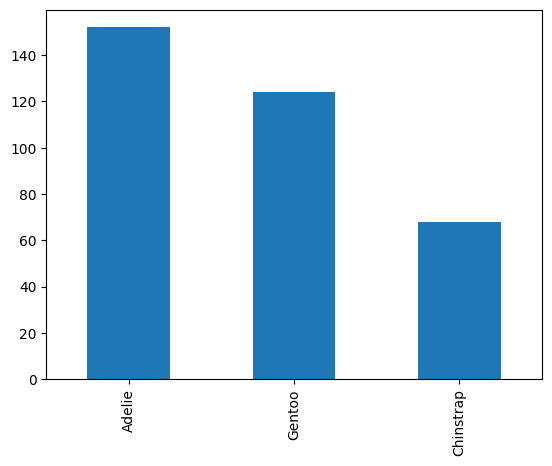

In [38]:
data['species'].value_counts().plot(kind='bar')


<Axes: >

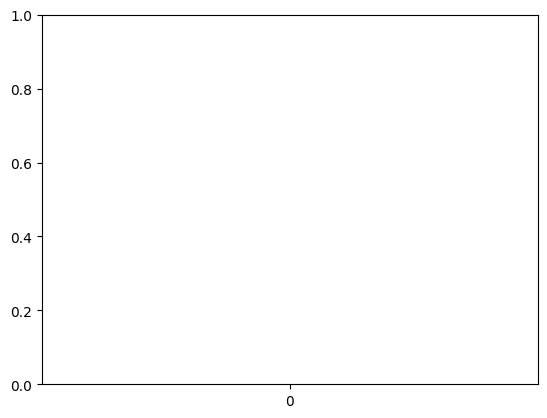

In [39]:
df1 = data[['bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
sns.boxplot(dat=df1, width=0.5,fliersize=5)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


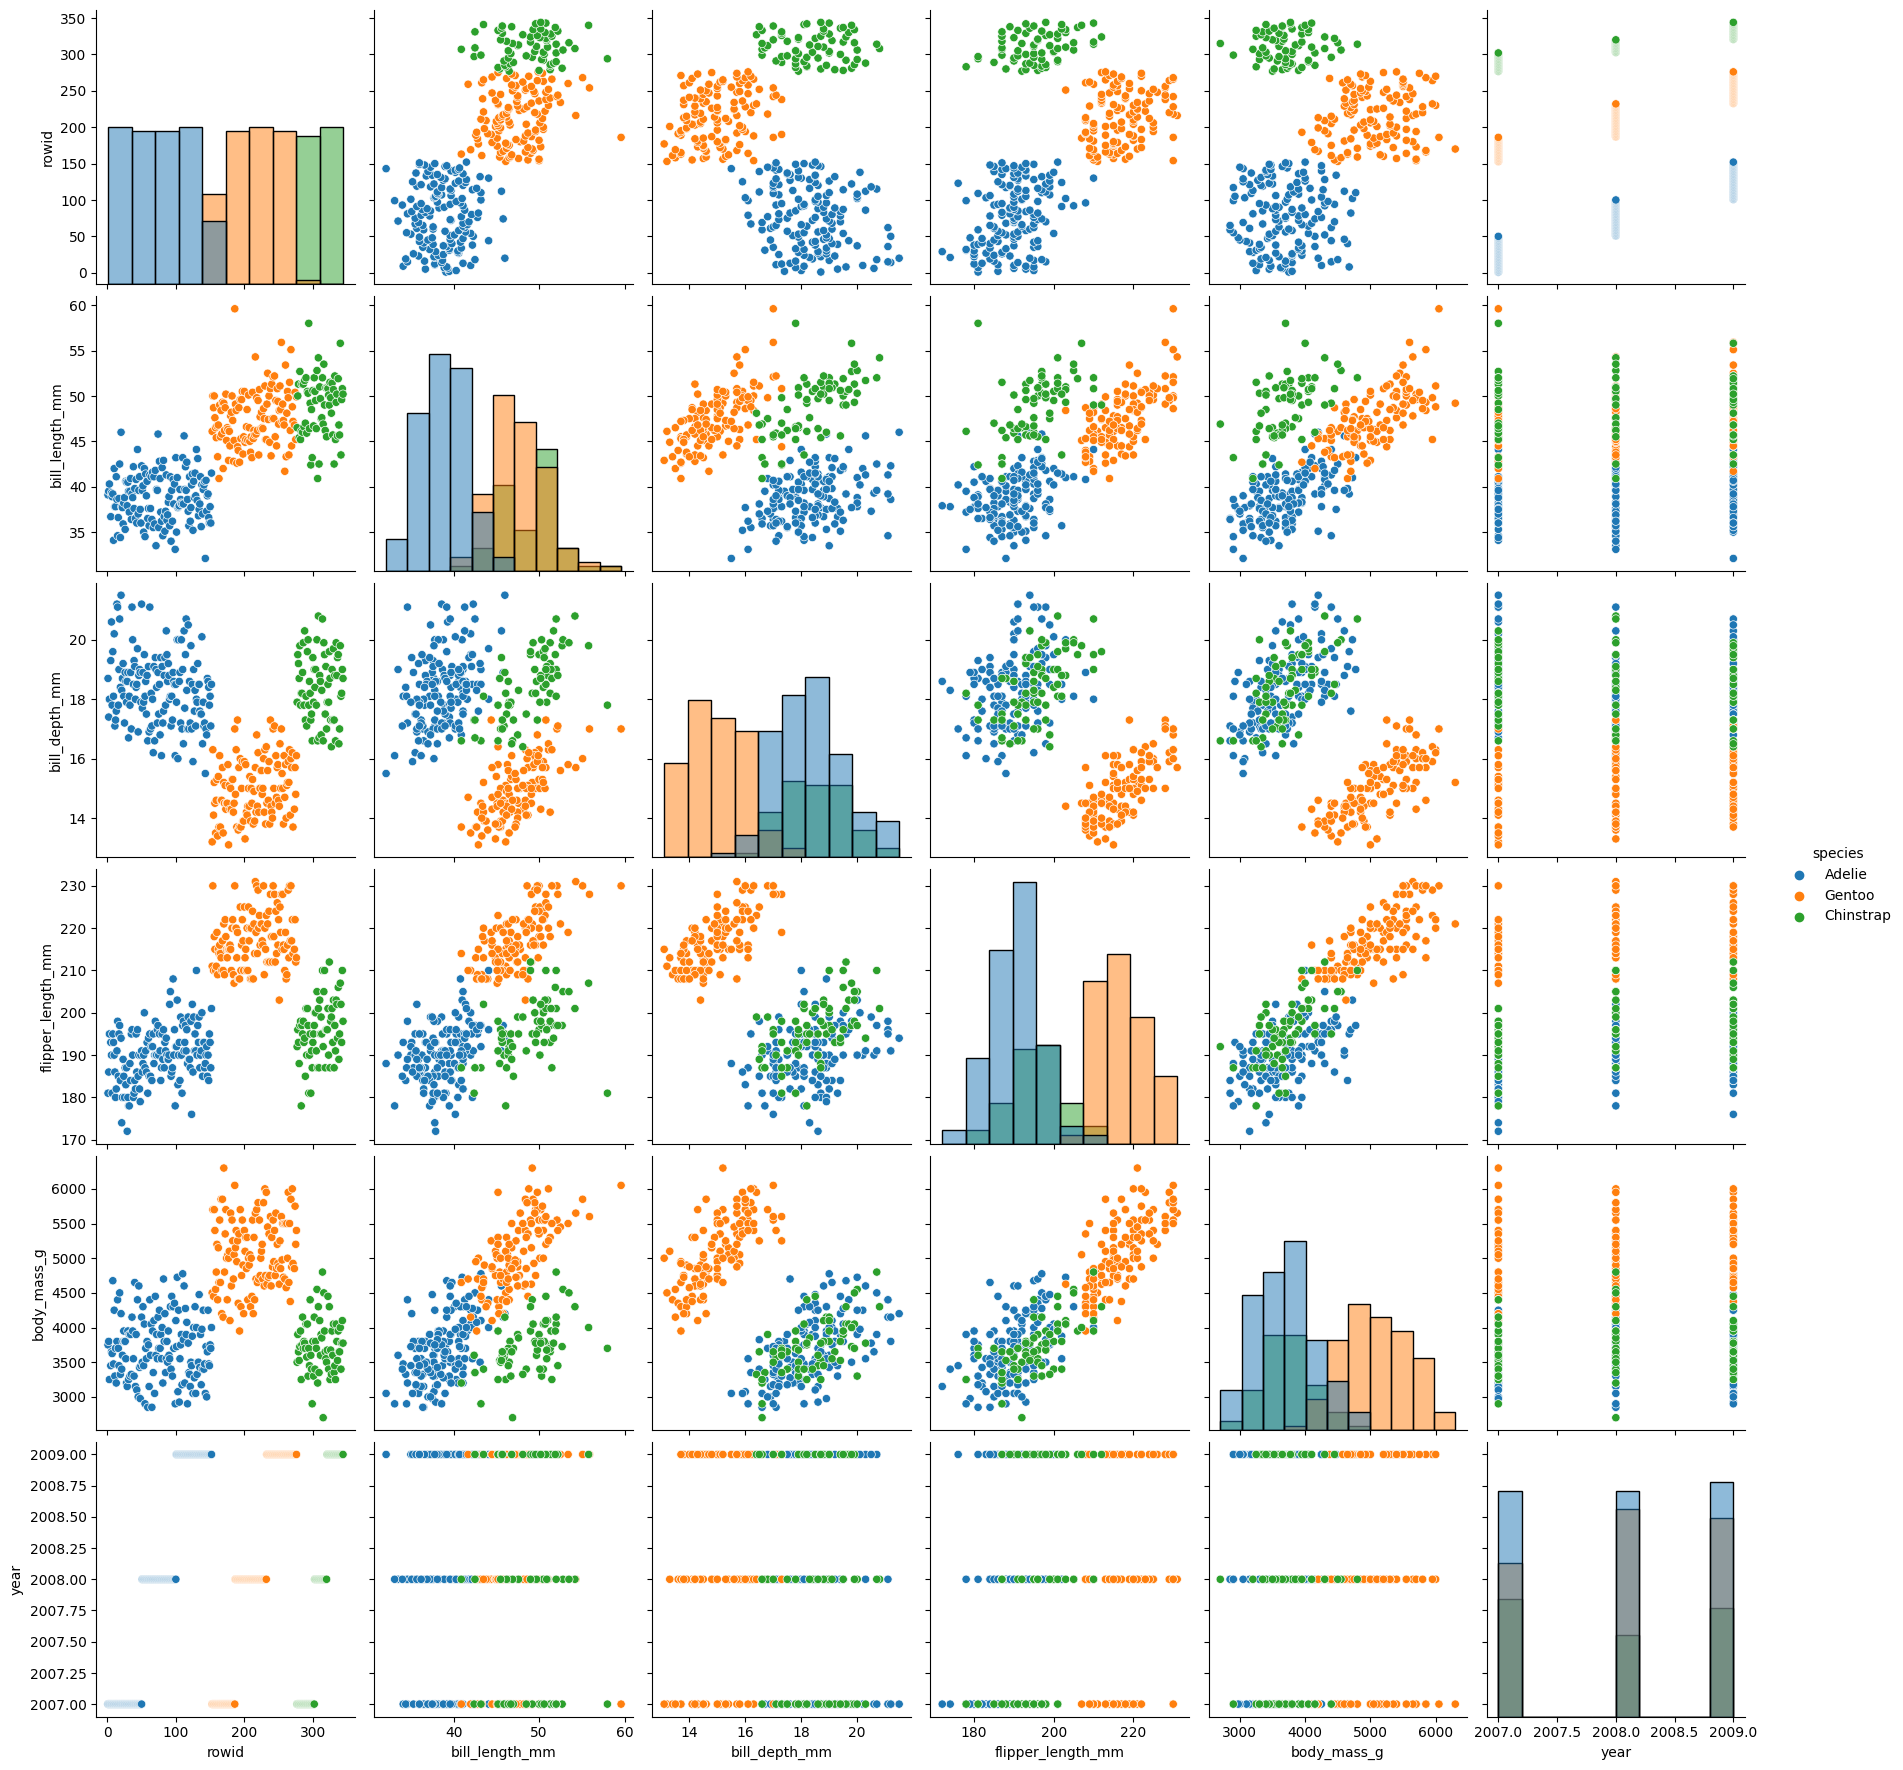

In [ ]:
sns.pairplot(data, hue="species", size=3,diag_kind="hist")

In [ ]:
data.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

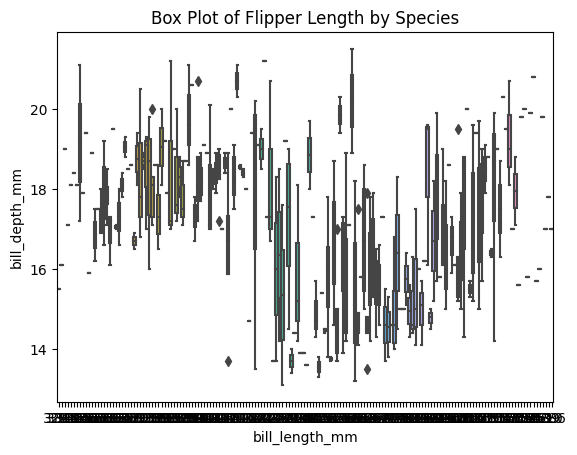

In [40]:

sns.boxplot(x="bill_length_mm", y="bill_depth_mm", data=data)
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Box Plot of Flipper Length by Species")
plt.show()


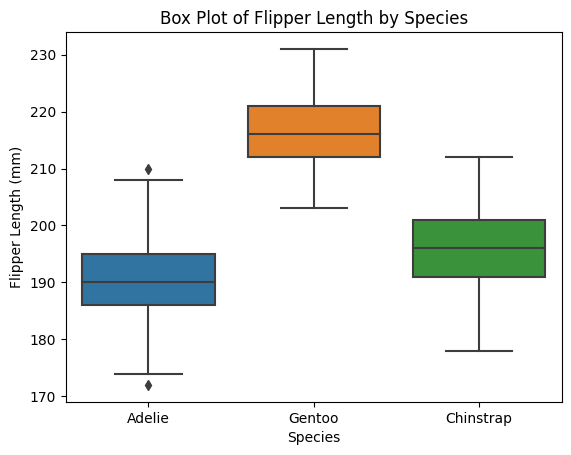

In [41]:

sns.boxplot(x="species", y="flipper_length_mm", data=data)
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.title("Box Plot of Flipper Length by Species")
plt.show()



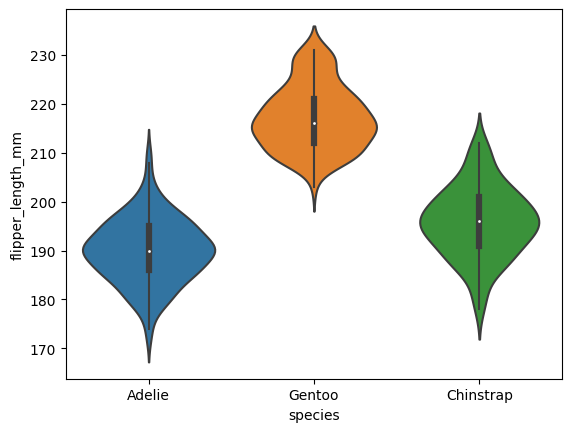

In [42]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=data, size=6)

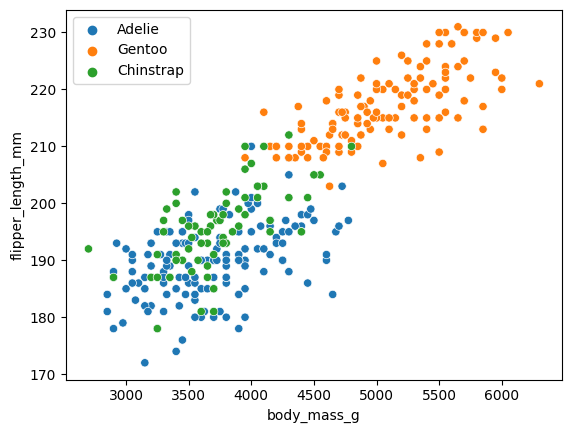

In [43]:
sns.scatterplot(data=data, x="body_mass_g", y="flipper_length_mm", hue="species")
plt.legend()# which shows different species represented by the colors.
plt.show()

#**ASSIGNMENT-4**

In [44]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [46]:
data = pd.read_csv("/content/heart.csv")

In [45]:
print(data.columns)


Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [47]:
data.shape

(303, 14)

In [48]:
data.tail()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0

<Axes: >

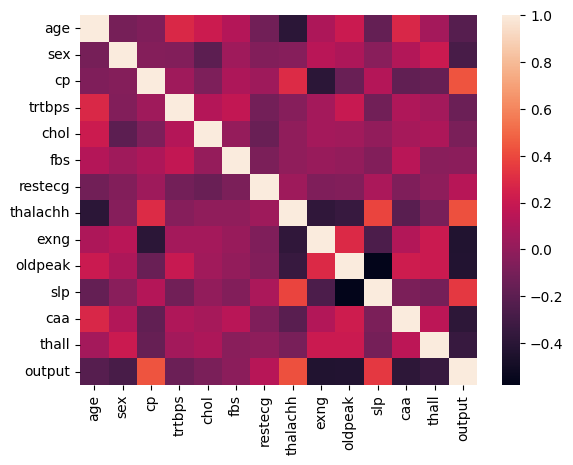

In [49]:
sns.heatmap(data.corr())

In [50]:
 #Total Percentage of Missing Data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


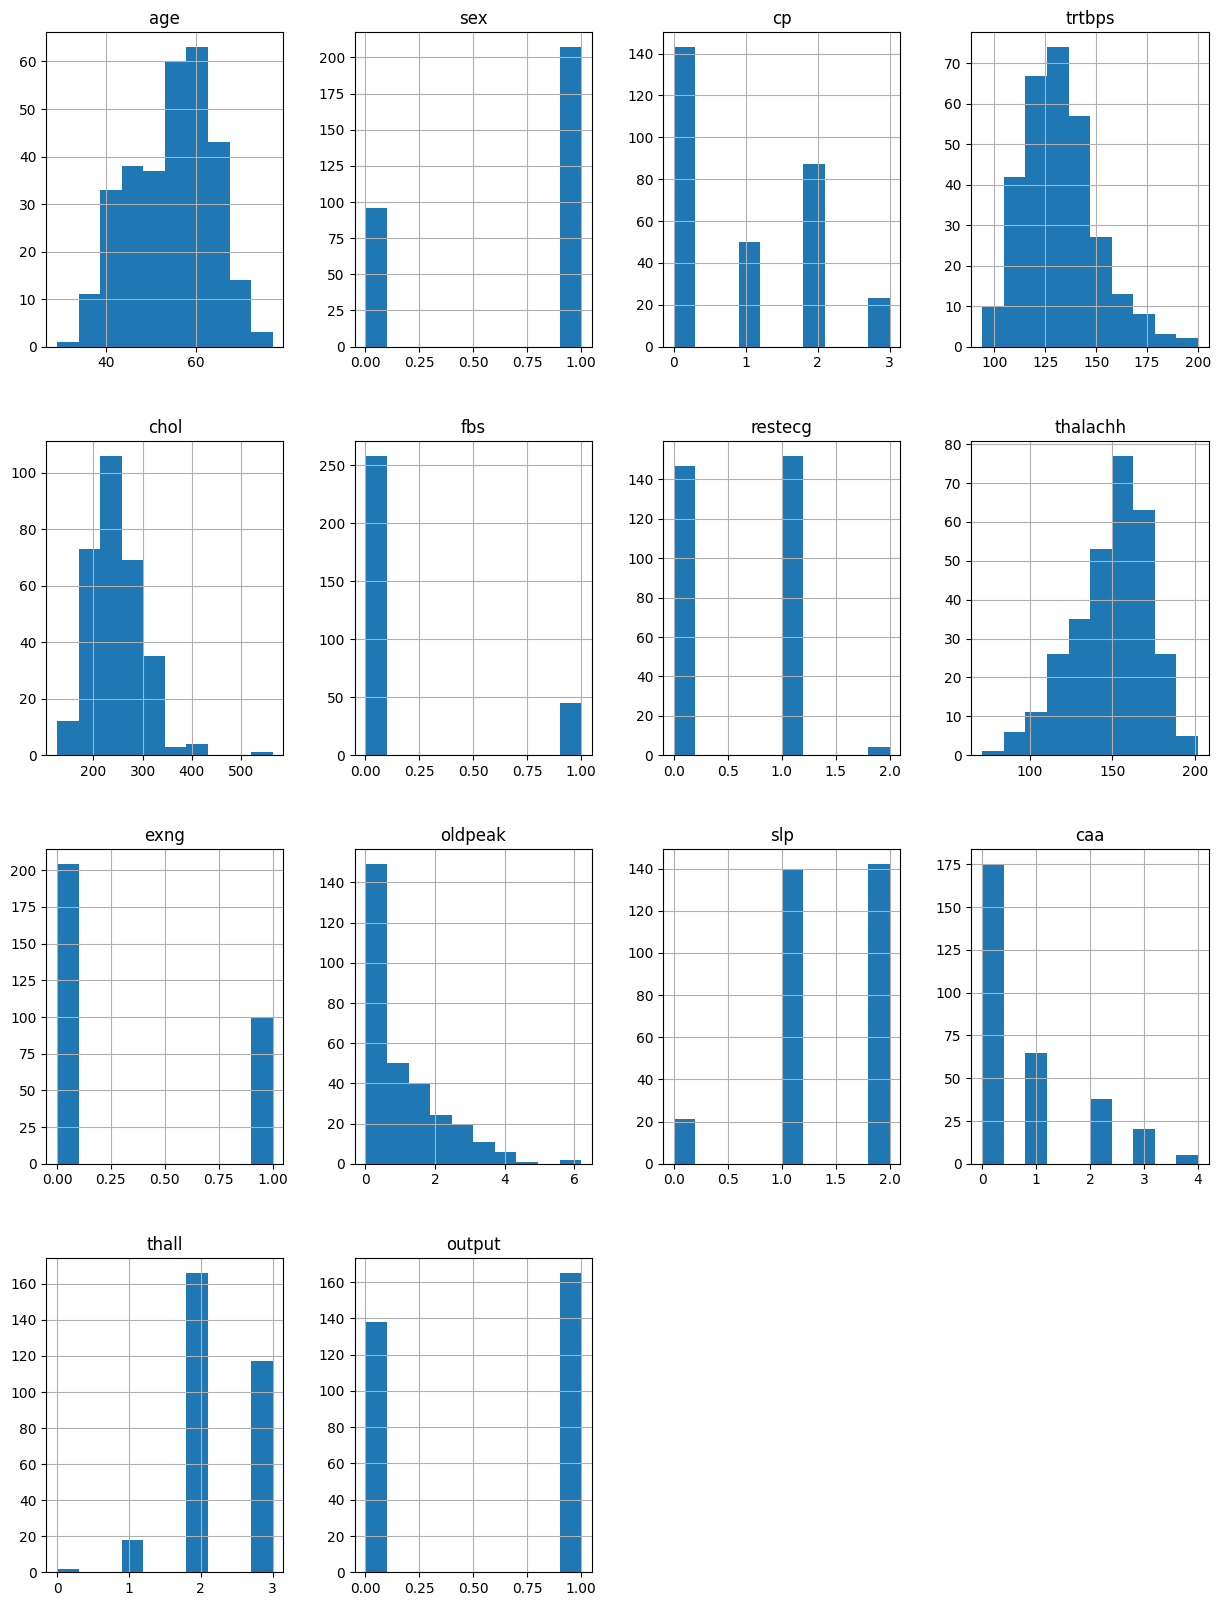

In [51]:
data.hist(figsize=(15, 20))
plt.show()

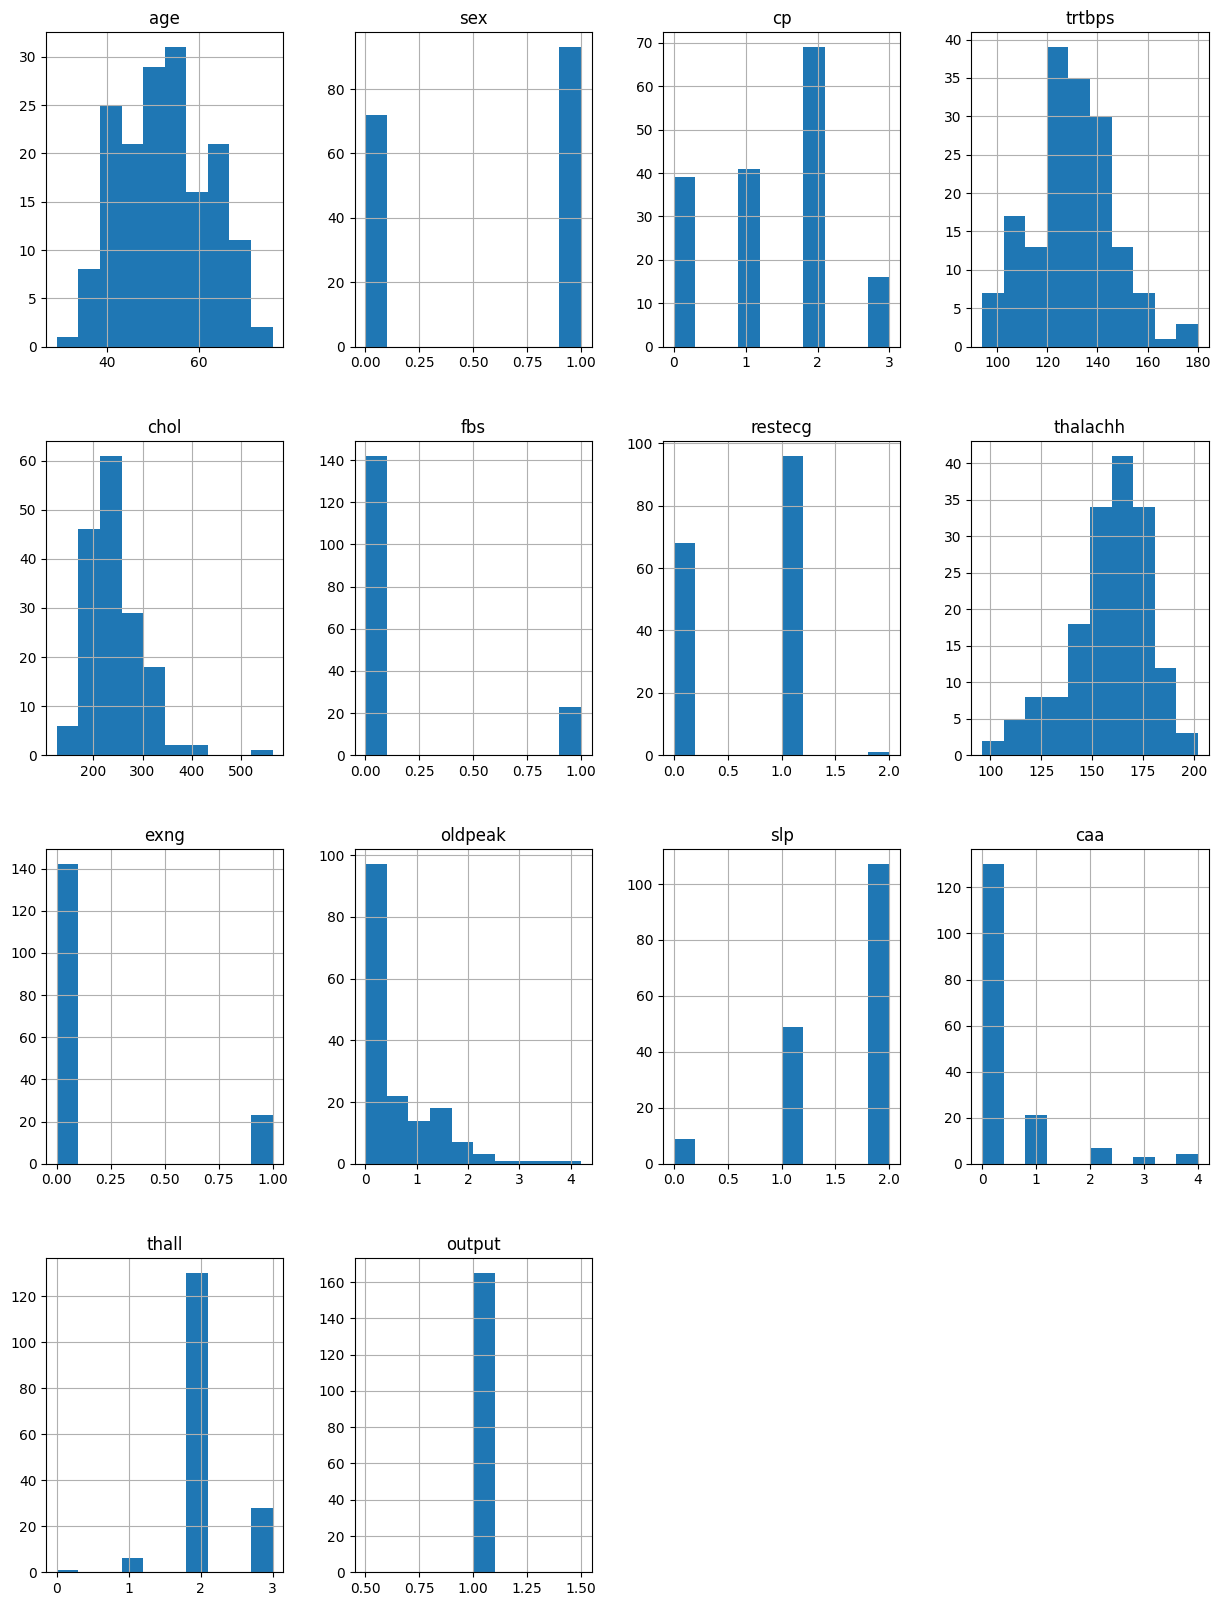

In [52]:
dataset_copy = data[data['output'] == 1]  # Filter the dataset based on the target variable

columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
           'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']  # Update with the correct column names

dataset_copy[columns].hist(figsize=(15, 20))
plt.show()

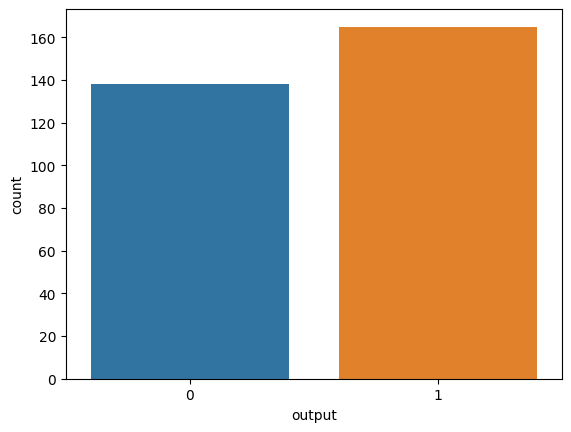

In [53]:
sns.countplot(x='output',data=data)
plt.show()

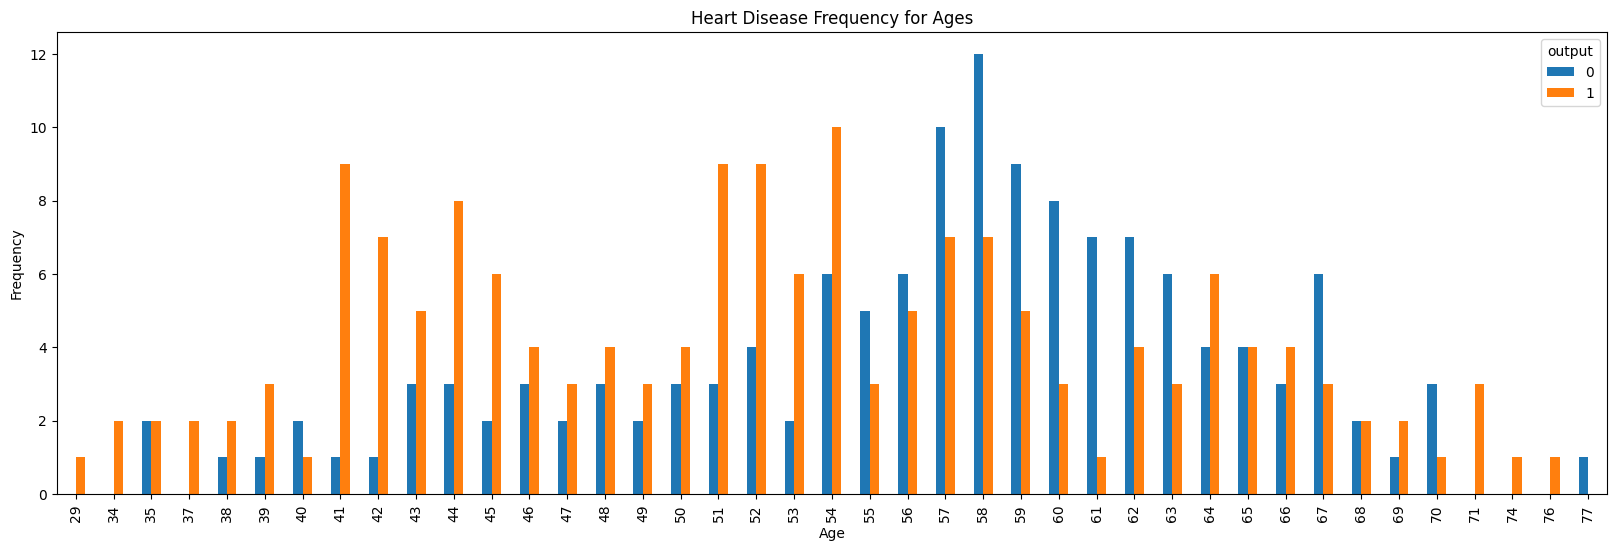

In [54]:
data.pivot_table(index='age', columns='output', aggfunc='size').plot(kind='bar', figsize=(20, 6))

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [55]:
X = data.drop('output', axis=1)
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 0.6457 - accuracy: 0.6570
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.8017
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8264
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8388
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8512
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8554
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8719
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8802
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8843
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8884


In [58]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


2/2 [==============================] - 0s 4ms/step - loss: 0.3982 - accuracy: 0.8689
Test Loss: 0.3982
Test Accuracy: 0.8689
